# Gain insight into monthly and yearly datasets.

The yearly dataset is created using yearly averages performed with CDO (Climate Data Operators)

In [6]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
matplotlib.rcParams['figure.figsize'] = (14.0, 10.0)
import numpy as np
import os.path
import netCDF4 as nc
import pandas as pd

from cartopy.util import add_cyclic_point

    100% |████████████████████████████████| 12.1MB 193kB/s  eta 0:00:01
    100% |████████████████████████████████| 51kB 16.8MB/s ta 0:00:01
    100% |████████████████████████████████| 204kB 11.2MB/s eta 0:00:01
  Running setup.py bdist_wheel for cartopy ... done
  Stored in directory: /home/ldap-server/shacklebolt/.cache/pip/wheels/45/7f/3b/37879587817fd1bbbee7b47312e2401b4f542cccf2fbe9b4ee
  Running setup.py bdist_wheel for shapely ... done
  Stored in directory: /home/ldap-server/shacklebolt/.cache/pip/wheels/b9/0b/0b/4e40c1db1c9638f4d0a4033e6fbafebf57beb584866a51a462
Successfully built cartopy shapely
Exception:
Traceback (most recent call last):
  File "/opt/jupyterhub/lib/python3.6/site-packages/pip/basecommand.py", line 215, in main
    status = self.run(options, args)
  File "/opt/jupyterhub/lib/python3.6/site-packages/pip/commands/install.py", line 360, in run
    prefix=options.prefix_path,
  File "/opt/jupyterhub/lib/python3.6/site-packages/pip/req/req_set.py", line 784, in 

ModuleNotFoundError: No module named 'cartopy'

In [2]:
DIRECTORY_DATASETS_ORIGINAL = "Datasets/Original/"
DIRECTORY_DATASETS_INTERPOLATED = "Datasets/Interpolated/"
DIRECTORY_IMAGES = "Images/"
DIRECTORY_OUTPUTS = "Output/"

In [3]:
dataset_iso = nc.Dataset(DIRECTORY_DATASETS_ORIGINAL+"xnapa_monthly_isotopes.nc","a")
# the xnapa_monthly_isotopes_fill file contains data from before running the fixing script.
dataset_iso_raw = nc.Dataset(DIRECTORY_DATASETS_ORIGINAL+"xnapa_monthly_isotopes_fill.nc","a")
dataset_precip = nc.Dataset(DIRECTORY_DATASETS_ORIGINAL+"xnapa_monthly_precip.nc","a")
dataset_tas = nc.Dataset(DIRECTORY_DATASETS_ORIGINAL+"xnapa_monthly_temp.nc","a")
dataset_slp = nc.Dataset(DIRECTORY_DATASETS_ORIGINAL+"xnapa_monthly_slp.nc","a")
dataset_yearly_iso = nc.Dataset(DIRECTORY_DATASETS_ORIGINAL+"xnapa_isotopes.nc","a")
dataset_yearly_precip = nc.Dataset(DIRECTORY_DATASETS_ORIGINAL+"xnapa_precip.nc","a")
dataset_yearly_tas = nc.Dataset(DIRECTORY_DATASETS_ORIGINAL+"xnapa_temp.nc","a")
dataset_yearly_slp = nc.Dataset(DIRECTORY_DATASETS_ORIGINAL+"xnapa_slp.nc","a")


In [4]:
d18O_monthly = np.squeeze(dataset_iso.variables["dO18"][:].data[...,1:-1,:])
d18O_monthly_raw = np.squeeze(dataset_iso_raw.variables["dO18"][:].data[...,1:-1,:])
d18O_yearly = np.squeeze(dataset_yearly_iso.variables["dO18"][:].data[...,1:-1,:])
tas_monthly = np.squeeze(dataset_tas.variables["temp_1"][:].data[...,1:-1,:])
tas_yearly = np.squeeze(dataset_yearly_tas.variables["temp_1"][:].data[...,1:-1,:])
precip_monthly = np.squeeze(dataset_precip.variables["precip"][:].data[...,1:-1,:])
precip_yearly = np.squeeze(dataset_yearly_precip.variables["precip"][:].data[...,1:-1,:])
slp_monthly = np.squeeze(dataset_slp.variables["p"][:].data[...,1:-1,:])
slp_yearly = np.squeeze(dataset_yearly_slp.variables["p"][:].data[...,1:-1,:])

In [5]:
lat = dataset_iso.variables["latitude"][:].data[1:-1]
lon = dataset_iso.variables["longitude"][:].data


t = dataset_iso.variables["t"][:].data
t_raw = dataset_iso_raw.variables["t"][:].data
t_tas = dataset_tas.variables["t"][:].data
t_precip = dataset_precip.variables["t"][:].data
t_slp = dataset_slp.variables["t"][:].data

t_yearly = dataset_yearly_iso.variables["t"][:].data
t_yearly_tas = dataset_yearly_tas.variables["t"][:].data
t_yearly_precip = dataset_yearly_precip.variables["t"][:].data
t_yearly_slp = dataset_yearly_slp.variables["t"][:].data

# Grid

In [6]:
print("We ignore latitudes:", dataset_iso.variables["latitude"][0],dataset_iso.variables["latitude"][-1])
print("Because no isotopes are calculated there.")

We ignore latitudes: 90.0 -90.0
Because no isotopes are calculated there.


In [7]:
print("Dimensionality of grid:", len(lat),"lat", len(lon),"lon")
print("Range:","lat:", min(lat)," ", max(lat), "lat:", min(lon)," ", max(lon))
print("Step:","lat:", lat[0]-lat[1], "lon:", lon[1]-lon[0])

Dimensionality of grid: 71 lat 96 lon
Range: lat: -87.5   87.5 lat: 0.0   356.25
Step: lat: 2.5 lon: 3.75


# Time

In [8]:
dataset_tas.variables["t"]

<class 'netCDF4._netCDF4.Variable'>
float32 t(t)
    standard_name: time
    long_name: t
    units: days since 2350-12-01 00:00:00
    calendar: 360_day
    axis: T
unlimited dimensions: t
current shape = (13822,)
filling on, default _FillValue of 9.969209968386869e+36 used

Simulation uses a 360 day (12 months with 30 days each) calendar, run starts in Dezember. (year: 2954 = 850 CE)

In original run, some months occur twice, some are missing:

Text(0.5, 0, 'month_length')

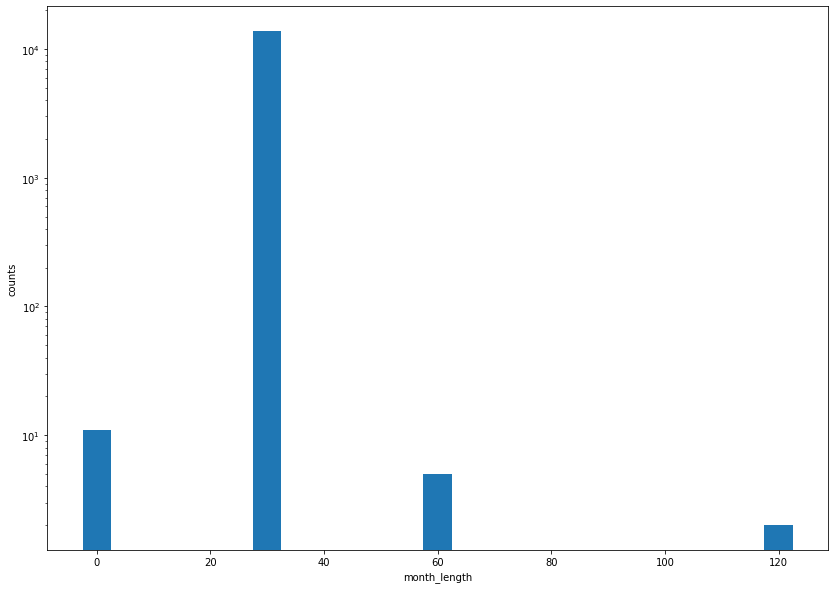

In [9]:
bins = np.linspace(-2.5,122.5,26)
plt.hist(t_raw[1:]-t_raw[:-1],bins=bins)
plt.yscale("log")

plt.ylabel("counts")
plt.xlabel("month_length")

Flawed month lenghts are very rare compared to total number though.
The distribution of flawed months in the run can be seen in the following plot: We can see that monthlengths of zero occur in the beginning, while missing months (delta >30 days) occur scattered through the run.

In [10]:
tmp = (t_raw[1:]-t_raw[:-1] != 30)
len(tmp[tmp==True])

18

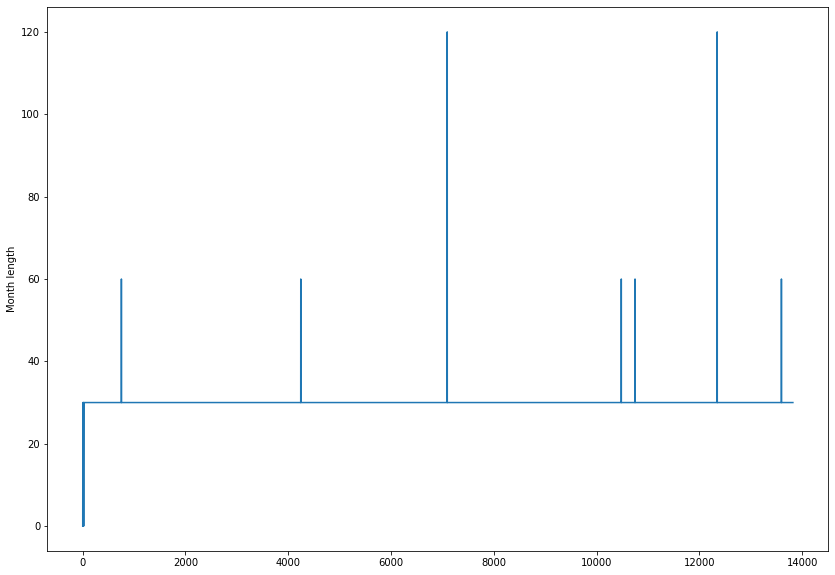

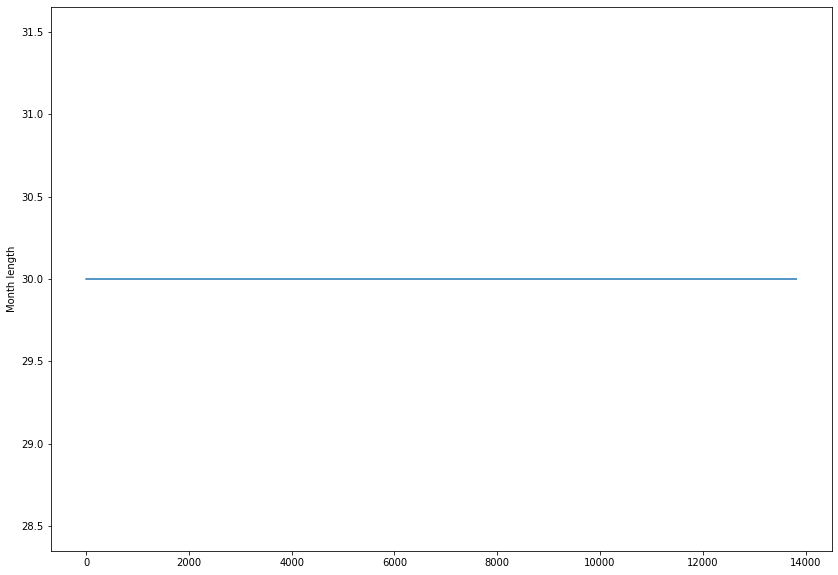

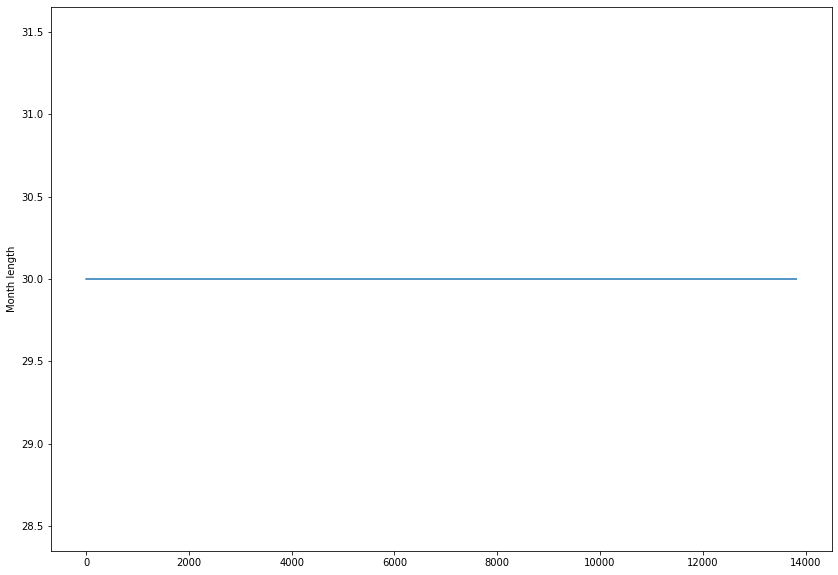

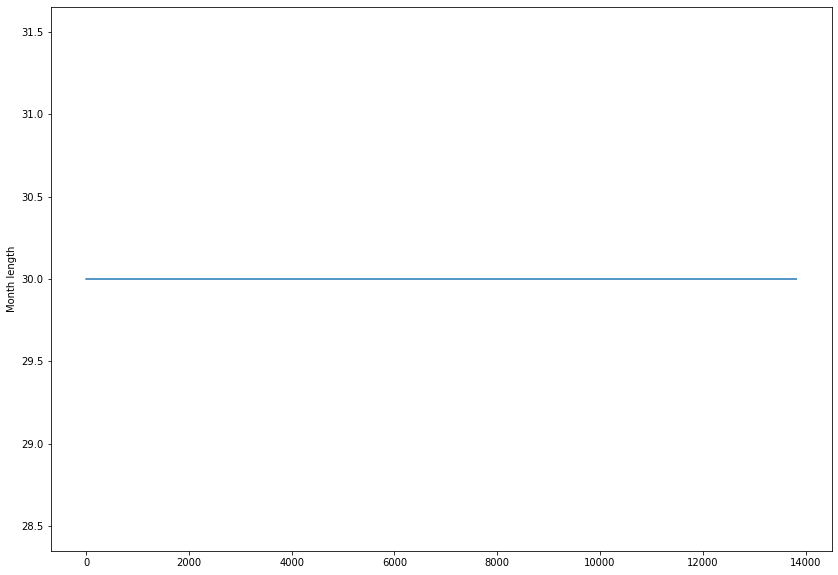

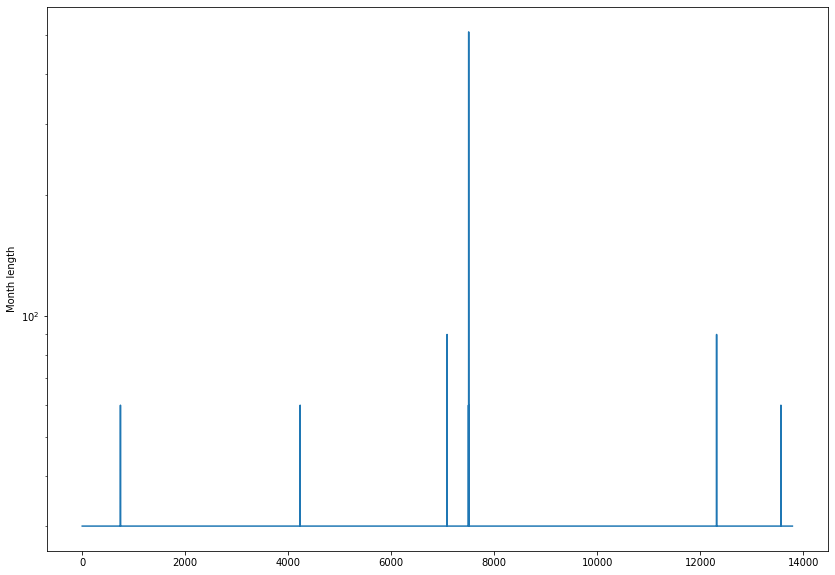

In [11]:
plt.plot(t_raw[1:]-t_raw[:-1])
plt.ylabel("Month length")
plt.show()
plt.plot(t[1:]-t[:-1])
plt.ylabel("Month length")
plt.show()
plt.plot(t_tas[1:]-t_tas[:-1])
plt.ylabel("Month length")
plt.show()
plt.plot(t_precip[1:]-t_precip[:-1])
plt.ylabel("Month length")
plt.show()
plt.plot(t_slp[1:]-t_slp[:-1])
plt.yscale('log')
plt.ylabel("Month length")
plt.show()


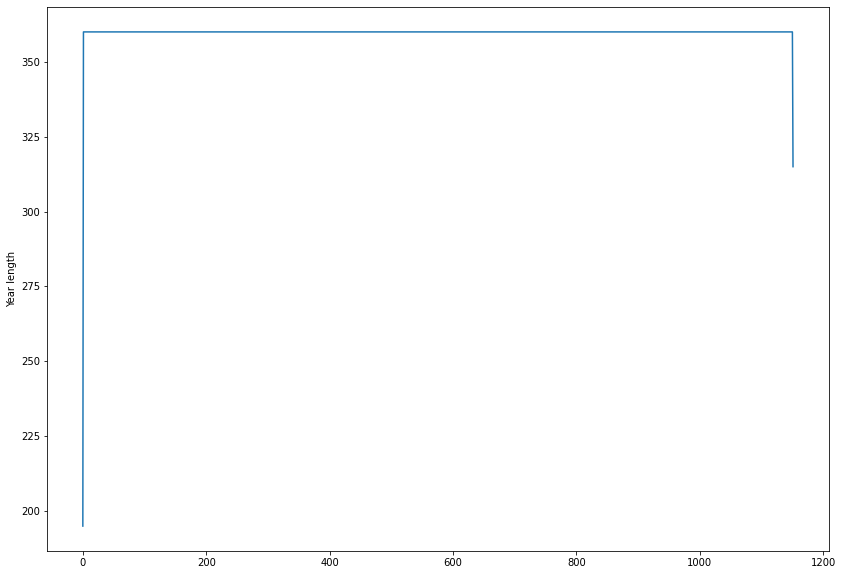

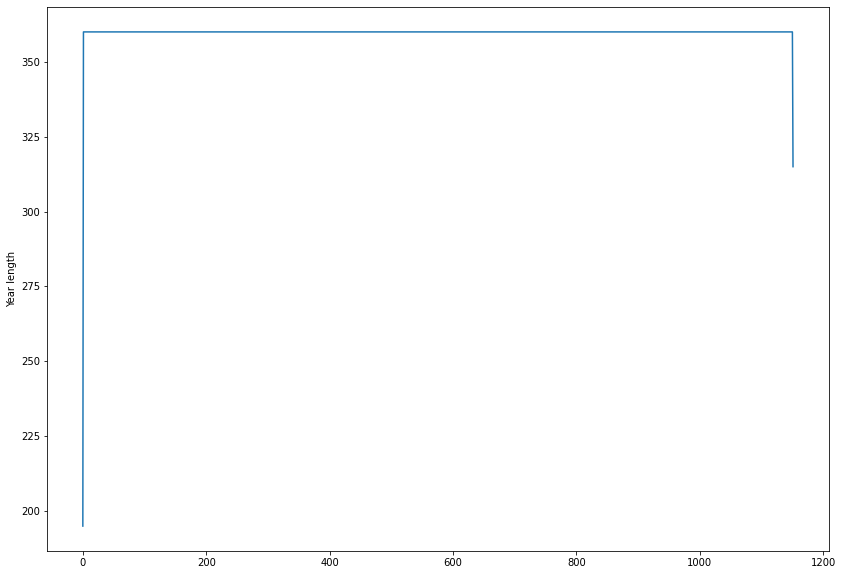

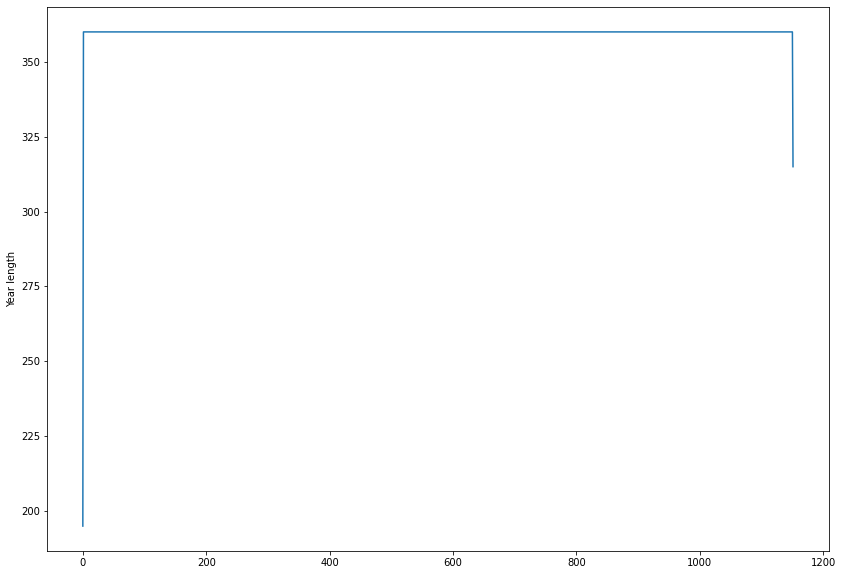

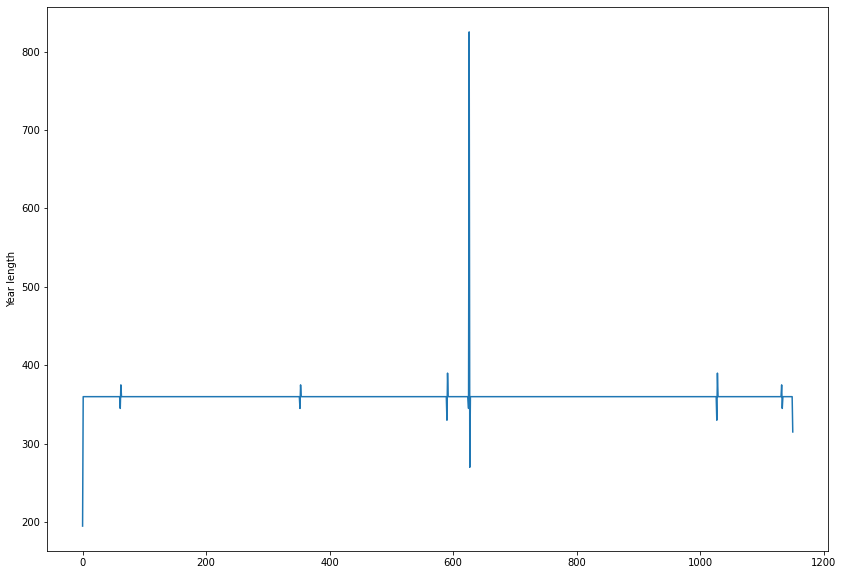

In [12]:
plt.plot(t_yearly[1:]-t_yearly[:-1])
plt.ylabel("Year length")
plt.show()
plt.plot(t_yearly_tas[1:]-t_yearly_tas[:-1])
plt.ylabel("Year length")
plt.show()
plt.plot(t_yearly_precip[1:]-t_yearly_precip[:-1])
plt.ylabel("Year length")
plt.show()
plt.plot(t_yearly_slp[1:]-t_yearly_slp[:-1])
plt.ylabel("Year length")
plt.show()

In [13]:
# get indices of elements that are shared for all variables.
from functools import reduce

common_dates_months = reduce(np.intersect1d, (t, t_tas, t_precip, t_slp))
common_dates_years = reduce(np.intersect1d, (t_yearly, t_yearly_tas, t_yearly_precip, t_yearly_slp))

i_iso = []
i_tas = []
i_slp = []
i_precip = []

i_yearly_iso = []
i_yearly_tas = []
i_yearly_slp = []
i_yearly_precip = []


for i, date in enumerate(t):
    if date in common_dates_months:
        i_iso.append(i)
for i, date in enumerate(t_tas):
    if date in common_dates_months:
        i_tas.append(i)
for i, date in enumerate(t_precip):
    if date in common_dates_months:
        i_precip.append(i)
for i, date in enumerate(t_slp):
    if date in common_dates_months:
        i_slp.append(i)
        
for i, date in enumerate(t_yearly):
    if date in common_dates_years:
        i_yearly_iso.append(i)
for i, date in enumerate(t_yearly_tas):
    if date in common_dates_years:
        i_yearly_tas.append(i)
for i, date in enumerate(t_yearly_precip):
    if date in common_dates_years:
        i_yearly_precip.append(i)
for i, date in enumerate(t_yearly_slp):
    if date in common_dates_years:
        i_yearly_slp.append(i)

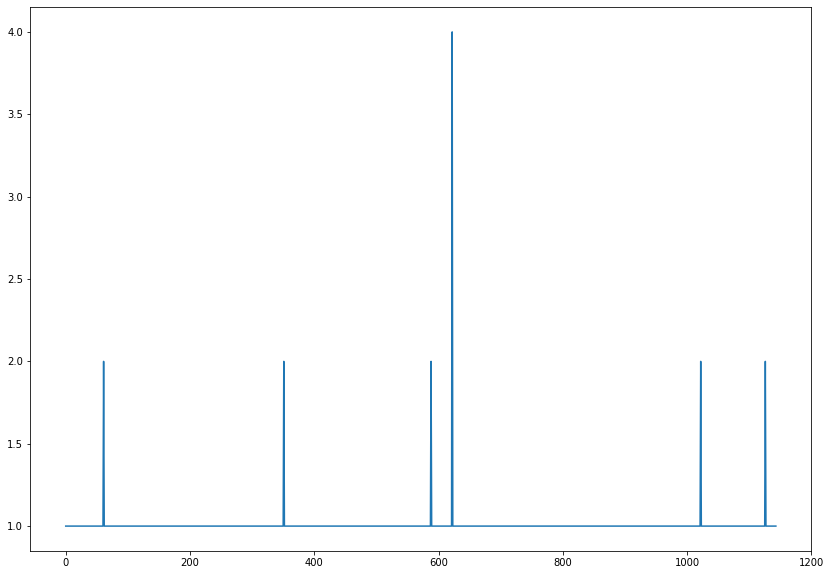

In [14]:
plt.plot(np.array(i_yearly_tas)[1:] - np.array(i_yearly_tas)[:-1])

In [15]:
i_iso = np.array(i_iso)
i_tas = np.array(i_tas)
i_slp = np.array(i_slp)
i_precip = np.array(i_precip)

i_yearly_iso = np.array(i_yearly_iso)
i_yearly_tas = np.array(i_yearly_tas)
i_yearly_slp = np.array(i_yearly_slp)
i_yearly_precip = np.array(i_yearly_precip)

# if t // 360 = 643 years have passed in the simulation, we are in 850 CE 
index_mask_years = np.logical_and(dataset_yearly_tas.variables["t"][i_yearly_tas].data // 360 >= 654, \
                                  dataset_yearly_tas.variables["t"][i_yearly_tas].data // 360 < 1654)

index_mask = np.logical_and(dataset_tas.variables["t"][i_tas].data // 360 >= 654, \
                            dataset_tas.variables["t"][i_tas].data // 360 < 1654)

In [16]:
print("Number of years excluded:", np.amax(i_yearly_tas[index_mask_years]) - np.amin(i_yearly_tas[index_mask_years]) - len(i_yearly_tas[index_mask_years]) + 1)
print("Number of months excluded:", np.amax(i_tas[index_mask]) - np.amin(i_tas[index_mask]) - len(i_tas[index_mask]) + 1)

Number of years excluded: 7
Number of months excluded: 31


# Check whether this is a problem of the "t" variable or of the whole dataset


The following contains a short investigation whether the "missing months" problem is really caused by missing months or only a problem of the time domain. To do so we compare the projection onto the first principle component of the non-deseasonalized data.

In [17]:
months_indices = []
months_indices_trivial = []
for i in range(12):
    # following the date in the run
    months_indices.append(np.where(t_raw%360 == (t_raw[0] + 30*i)%360))
    # assuming no missing screenshots, only wrong time coordinate.
    months_indices_trivial.append(np.arange(i,len(t_raw),12))

In [18]:
t_raw[months_indices[0]]

array([216375., 216375., 216735., ..., 630015., 630375., 630735.],
      dtype=float32)

In [19]:
indices_wrong_months = np.where(t_raw[1:]-t_raw[:-1] != 30)

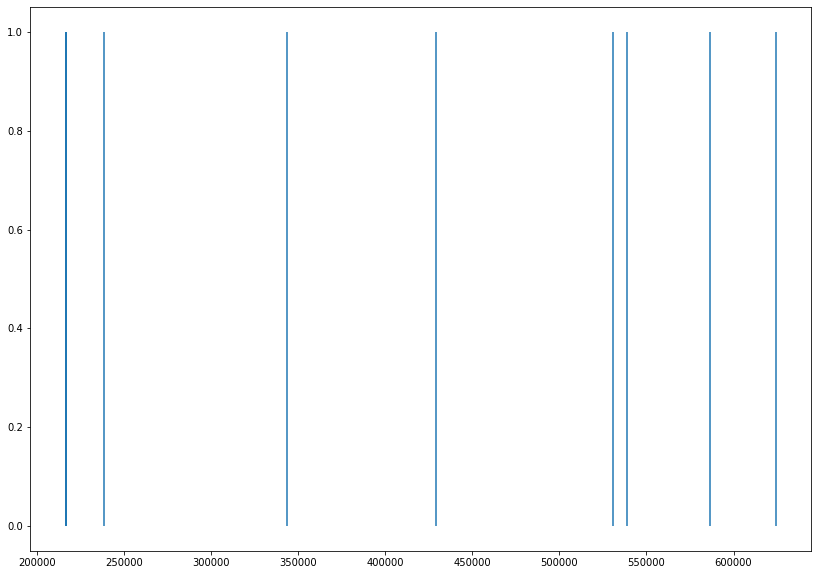

In [20]:
# plt.plot(t[months_indices[3]],gmt[months_indices[3]])
plt.vlines(t_raw[indices_wrong_months],ymin=0,ymax=1)

## Compute first PCA to do analysis of whether months change with t or not

In [21]:
from sklearn.decomposition import PCA

In [22]:
# for each pixel calculate the 1 and 99 percentile.
p_min, p_max = np.percentile(d18O_monthly,[0.3,99.7])
print(np.amin(p_min), np.amax(p_max))

-72.86918824005127 27.47552019309913


In [23]:
# set everything that is outside this range to a) the mean of the iside of this range or b) the edges
mask = (d18O_monthly_raw<p_max) & (d18O_monthly_raw>p_min)
mean = np.average(d18O_monthly_raw,weights=mask,axis=0)
d18O_filter_outliers = mean*np.ones_like(d18O_monthly_raw)
d18O_filter_outliers[mask] = d18O_monthly_raw[mask]

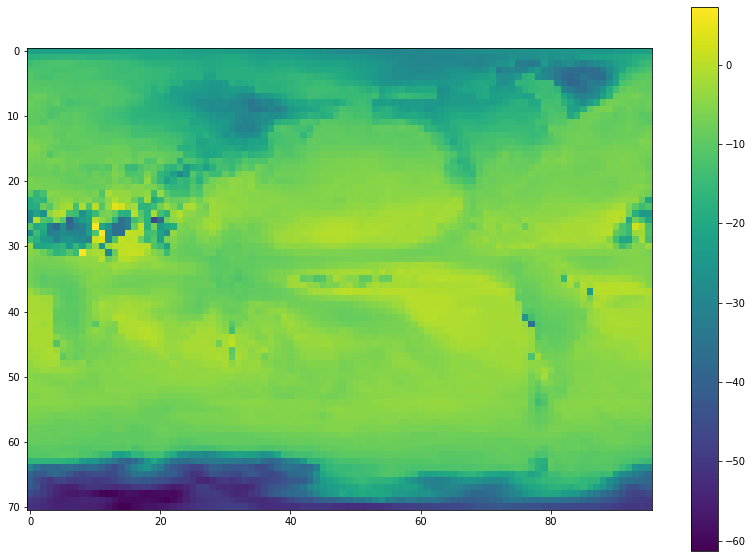

In [24]:
plt.imshow(d18O_filter_outliers[1,...])
plt.colorbar()

In [25]:
n_components = 1
pca = PCA(n_components=n_components)

In [26]:
pca.fit(d18O_filter_outliers.reshape(d18O_filter_outliers.shape[0],-1))

PCA(n_components=1)

In [27]:
c = pca.components_

In [28]:
c = c.reshape(n_components,len(lat),len(lon))

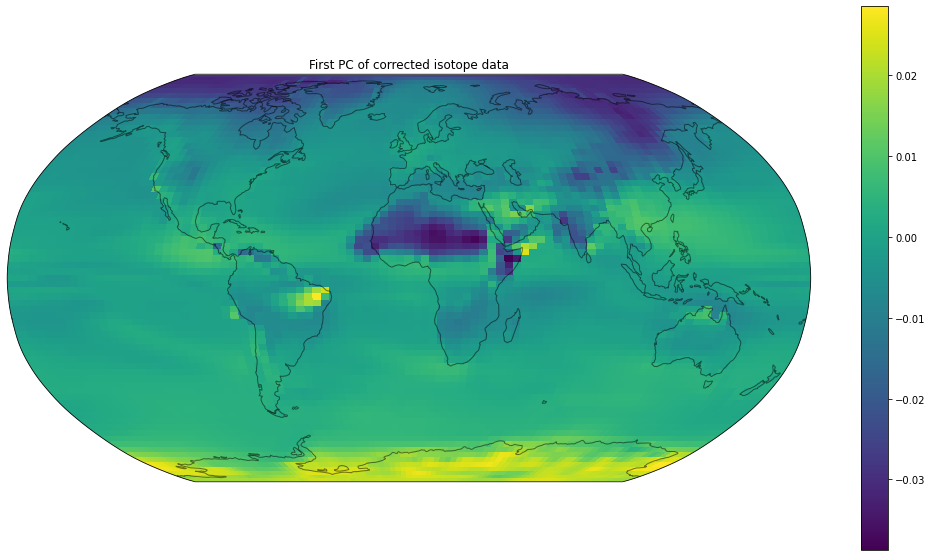

In [29]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(projection=ccrs.Robinson())
ax.set_global()

data, lon_plot = add_cyclic_point(c[0], coord = lon)
lo, la = np.meshgrid(lon_plot, lat)

layer = ax.pcolormesh(lo, la, data, transform=ccrs.PlateCarree(), cmap="viridis")    

ax.coastlines(alpha=0.5)
plt.colorbar(layer)
plt.title("First PC of corrected isotope data")
plt.show()

In [30]:
proj = np.einsum("ijk, jk -> i", d18O_filter_outliers, c[0])

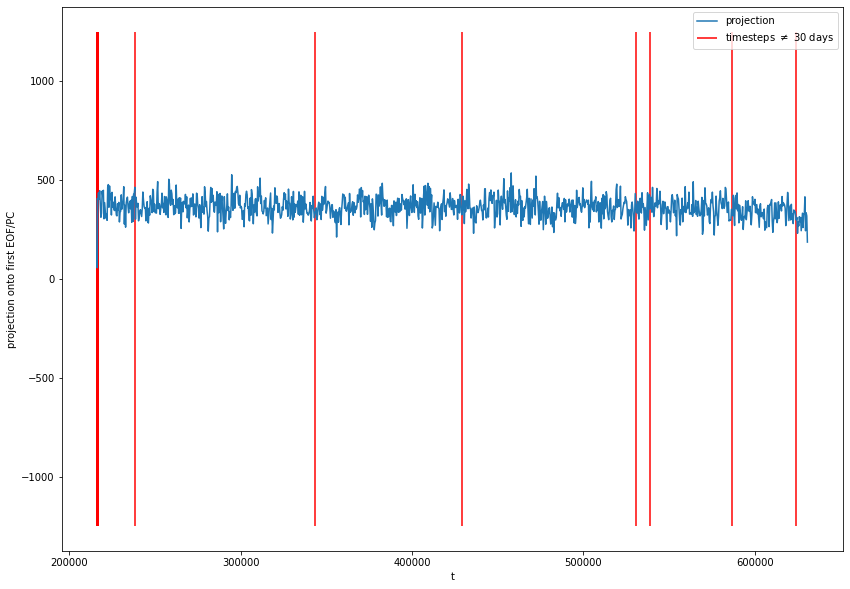

In [31]:
plt.plot(t_raw[months_indices[0]],proj[months_indices[0]],label="projection")
plt.vlines(t_raw[indices_wrong_months],ymin=-1250,ymax=1250, color="r", label=r"timesteps $\neq$ 30 days")
plt.xlabel("t")
plt.ylabel("projection onto first EOF/PC")
plt.legend(loc='best')

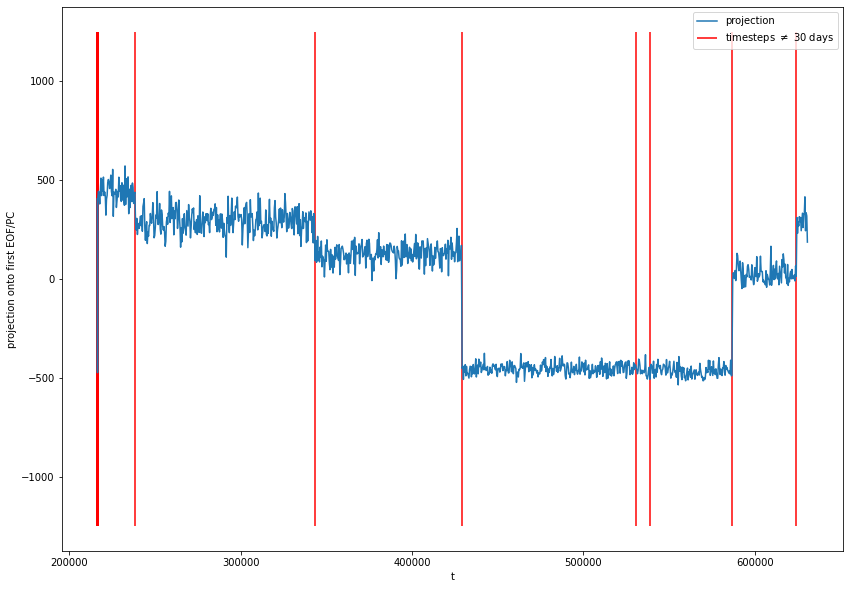

In [32]:
plt.plot(t_raw[months_indices_trivial[0]],proj[months_indices_trivial[0]],label="projection")
plt.vlines(t_raw[indices_wrong_months],ymin=-1250,ymax=1250, color="r", label=r"timesteps $\neq$ 30 days")
plt.xlabel("t")
plt.ylabel("projection onto first EOF/PC")
plt.legend(loc='best')

We can see that using the internal time the definition of a month stays consistent, while using the trivial "index" time doesn't work.

# Conclusion: 

There are problems with the raw isotope-dataset. Some timesteps apear twice, some are missing. Maybe these are related to other problems with the data, we will see.

###  Can we find out which month is which?

In [33]:
indices_wrong_months

(array([    0,     2,     4,     6,     8,    10,    12,    14,    16,
           18,    20,   753,  4243,  7094, 10481, 10748, 12348, 13597]),)

In [34]:
dataset_tas.variables["t"]

<class 'netCDF4._netCDF4.Variable'>
float32 t(t)
    standard_name: time
    long_name: t
    units: days since 2350-12-01 00:00:00
    calendar: 360_day
    axis: T
unlimited dimensions: t
current shape = (13822,)
filling on, default _FillValue of 9.969209968386869e+36 used

Seems as if run starts with Dezember. Lets check this.

In [35]:
# zero date:
yl = 360
ml = 30
# assume yyyy-mm-dd format.
y_zero = 2350
m_zero = 12
d_zero = 1

tstamp = dataset_tas.variables["t"][:].data[0]

In [36]:
d_year = tstamp // yl
d_mon = (tstamp - d_year*yl) // ml
d_day = (tstamp - d_year*yl - d_mon*ml) // 1
print("Delta years: ", d_year,"Delta months: ", d_mon,"Delta days: ", d_day)
print("Adding to the start date: ", "Year: ", y_zero+d_year, "Month: ", m_zero+d_mon ,"Day:", d_zero+d_day)

Delta years:  601.0 Delta months:  0.0 Delta days:  15.0
Adding to the start date:  Year:  2951.0 Month:  12.0 Day: 16.0


So the first month in the timeseries should correspond to mid december - which would make sence if the monthly averaging centers the timestep of each month at it's mean.

# Check the isotopes

Look for missing values in the isotopes and investigate their distribution

In [37]:
dataset_iso.variables["dO18"]

<class 'netCDF4._netCDF4.Variable'>
float64 dO18(t, level-1_5, latitude, longitude)
    _FillValue: 2.0000000400817547e+20
    missing_value: 2.0000000400817547e+20
unlimited dimensions: t
current shape = (13822, 1, 73, 96)
filling on

In [38]:
fill_value = 2.0000000400817547e+20

In [39]:
#array that for each timestep contains true or False if it has missing values or not.
contains_invalid_pixels = np.array([(d18O_monthly_raw[j,...] == fill_value).any() for j in range(d18O_monthly_raw.shape[0])])
indices_invalid_isotopes = np.where(contains_invalid_pixels == True)[0]

In [40]:
print("Number of total timesteps:", len(d18O_monthly), "Timesteps with missing values", len(indices_invalid_isotopes))

Number of total timesteps: 13822 Timesteps with missing values 13438


It seems as if 13438 (almost all of the 13822 timesteps) have missing isotopes!
Look at some random samples from the whole dataset:

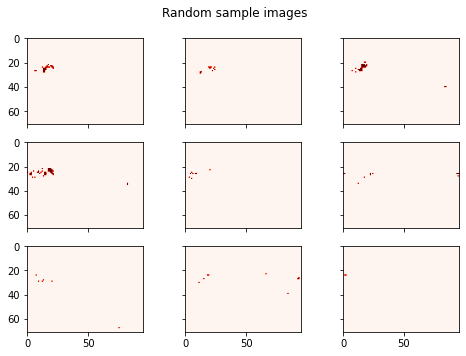

In [41]:
n_x = 3
n_y = 3
random_timesteps = np.random.randint(low=0,high=d18O_monthly.shape[0],size=n_x*n_y)                                 
fig, axs = plt.subplots(n_x, n_y, sharex=True, sharey=True)
fig.suptitle('Random sample images')
fig.set_figheight(5)
fig.set_figwidth(7)
for i in range(n_x):                                     
    for j in range(n_y):    
        # print([random_timesteps[j+4*i]])
        axs[i,j].imshow(d18O_monthly[random_timesteps[j+n_x*i],...],cmap="Reds")
plt.tight_layout()
plt.show()

Literally every month contains some masked/missing values.

# Look how big the precipitation is in the regions where the isotopes are masked - maybe it is zero everywhere?

In [42]:
# load the missing value mask for precip
d18O_missing_value_mask = np.squeeze(dataset_iso_raw.variables["dO18"][:].mask[...,1:-1,:])

In [43]:
len((precip_monthly[d18O_missing_value_mask] !=0))

219646

In [44]:
len((precip_monthly[d18O_missing_value_mask] ==0))

219646

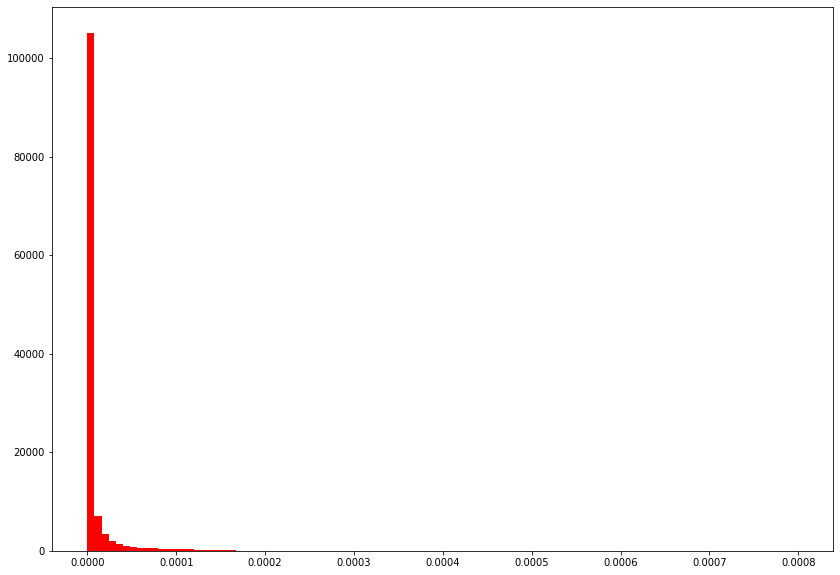

In [45]:
bins = np.linspace(0,np.amax(precip_monthly),101)
plt.hist(precip_monthly[d18O_missing_value_mask], color='r', bins=bins, density=True)
plt.show()

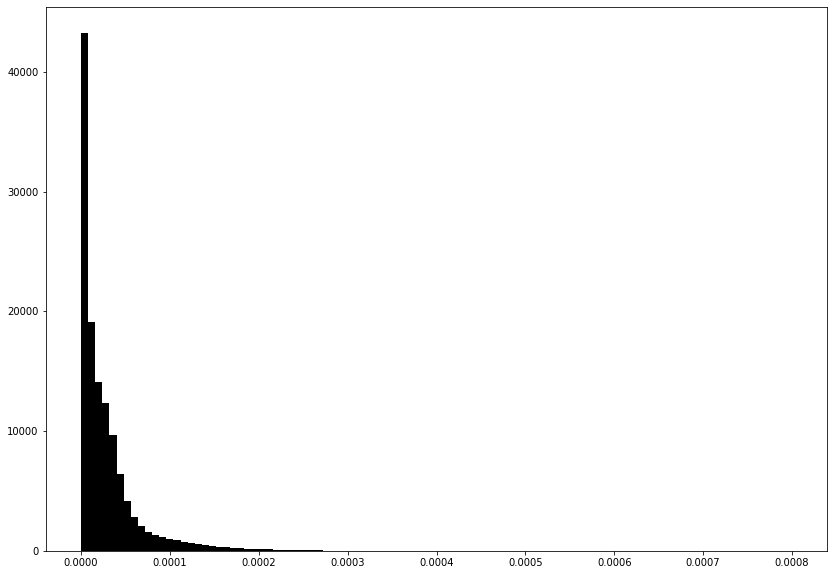

In [46]:
bins = np.linspace(0,np.amax(precip_monthly),101)
plt.hist(precip_monthly[~d18O_missing_value_mask], color='k', bins=bins, density=True)
plt.show()

Not every missing value corresponds to zero precip - but in general the precip is lower than in the default case.

# Check how many nans there are in the other variables:

In [47]:
print(dataset_tas.variables["temp_1"])
print(dataset_precip.variables["precip"])

<class 'netCDF4._netCDF4.Variable'>
float32 temp_1(t, surface, latitude, longitude)
    standard_name: surface_temperature
    long_name: Temperature T
    units: K
    _FillValue: 2e+20
    missing_value: 2e+20
    source: Unified Model Output (Vn 4.5):
    name: temp_1
    title: Temperature T
    date: 01/12/50
    time: 00:00
unlimited dimensions: t
current shape = (13822, 1, 73, 96)
filling on
<class 'netCDF4._netCDF4.Variable'>
float32 precip(t, surface, latitude, longitude)
    standard_name: precipitation_flux
    long_name: Total precipitation rate
    units: kg m-2 s-1
    _FillValue: 2e+20
    missing_value: 2e+20
    source: Unified Model Output (Vn 4.5):
    name: precip
    title: Total precipitation rate
    date: 01/12/50
    time: 00:00
unlimited dimensions: t
current shape = (13822, 1, 73, 96)
filling on


In [48]:
contains_invalid_pixels_tas = np.array([(tas_monthly[j,...] == fill_value).any() for j in range(tas_monthly.shape[0])])
indices_invalid_tas = np.where(contains_invalid_pixels_tas == True)

contains_invalid_pixels_precip = np.array([(precip_monthly[j,...] == fill_value).any() for j in range(precip_monthly.shape[0])])
indices_invalid_precip = np.where(contains_invalid_pixels_precip == True)

contains_invalid_pixels_slp = np.array([(slp_monthly[j,...] == fill_value).any() for j in range(slp_monthly.shape[0])])
indices_invalid_slp = np.where(contains_invalid_pixels_slp == True)

In [49]:
print("Temperature #timesteps with missing values: ", len(indices_invalid_tas[0]))
print("Precip #timesteps with missing values: ", len(indices_invalid_precip[0]))
print("Slp #timesteps with missing values: ", len(indices_invalid_slp[0]))

Temperature #timesteps with missing values:  0
Precip #timesteps with missing values:  0
Slp #timesteps with missing values:  0


In [50]:
# looks promissing - just to make sure, check on a pixelwise level:

print(tas_monthly[tas_monthly > 100])
print(precip_monthly[precip_monthly > 1])

[]
[]


Plot for some random timesteps:

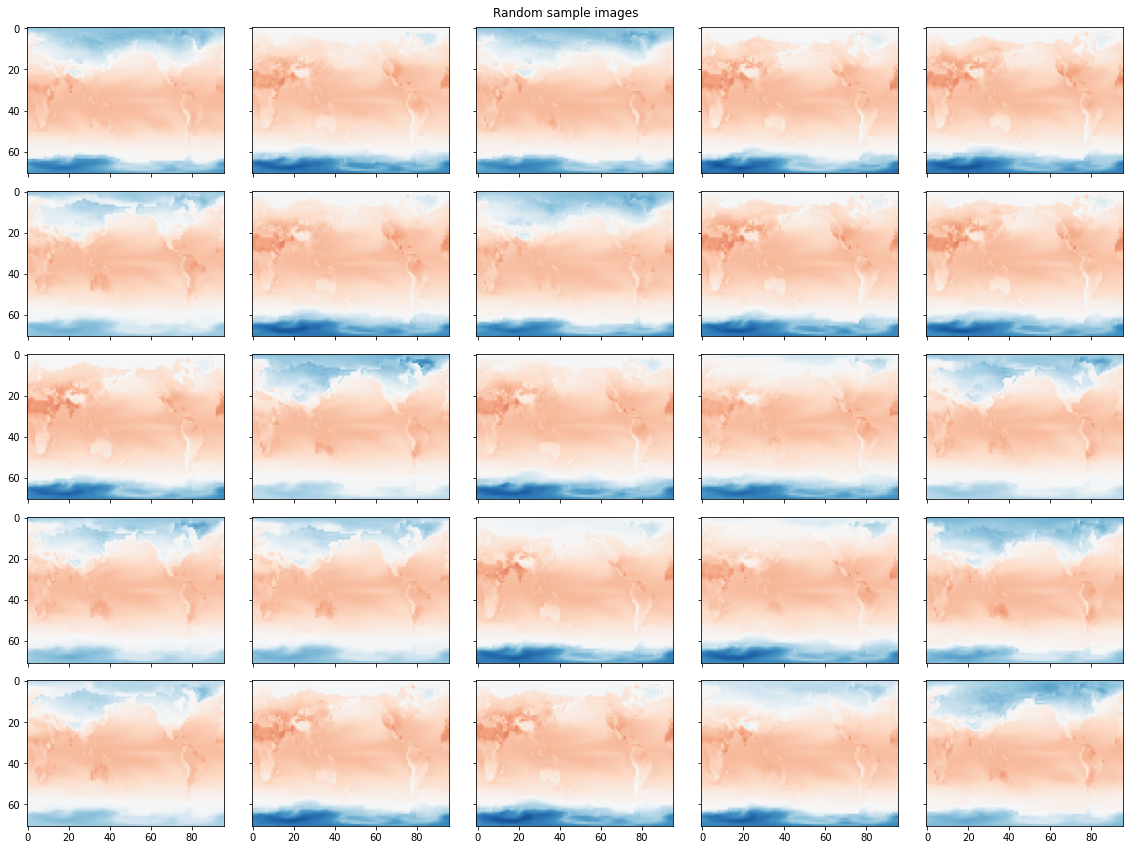

In [51]:
n_x = 5
n_y = 5
max_tas = max(abs(np.amax(tas_monthly)),abs(np.amin(tas_monthly)))
norm = matplotlib.colors.Normalize(-max_tas,max_tas)
random_timesteps = np.random.randint(low=0,high=tas_monthly.shape[0],size=n_x*n_y)                                 
fig, axs = plt.subplots(n_x, n_y, sharex=True, sharey=True)
fig.suptitle('Random sample images')
fig.set_figheight(12)
fig.set_figwidth(16)
for i in range(n_x):                                     
    for j in range(n_y):    
        # print([random_timesteps[j+4*i]])
        axs[i,j].imshow(tas_monthly[random_timesteps[j+n_x*i],...],cmap="RdBu_r", norm=norm)
plt.tight_layout()
plt.show()

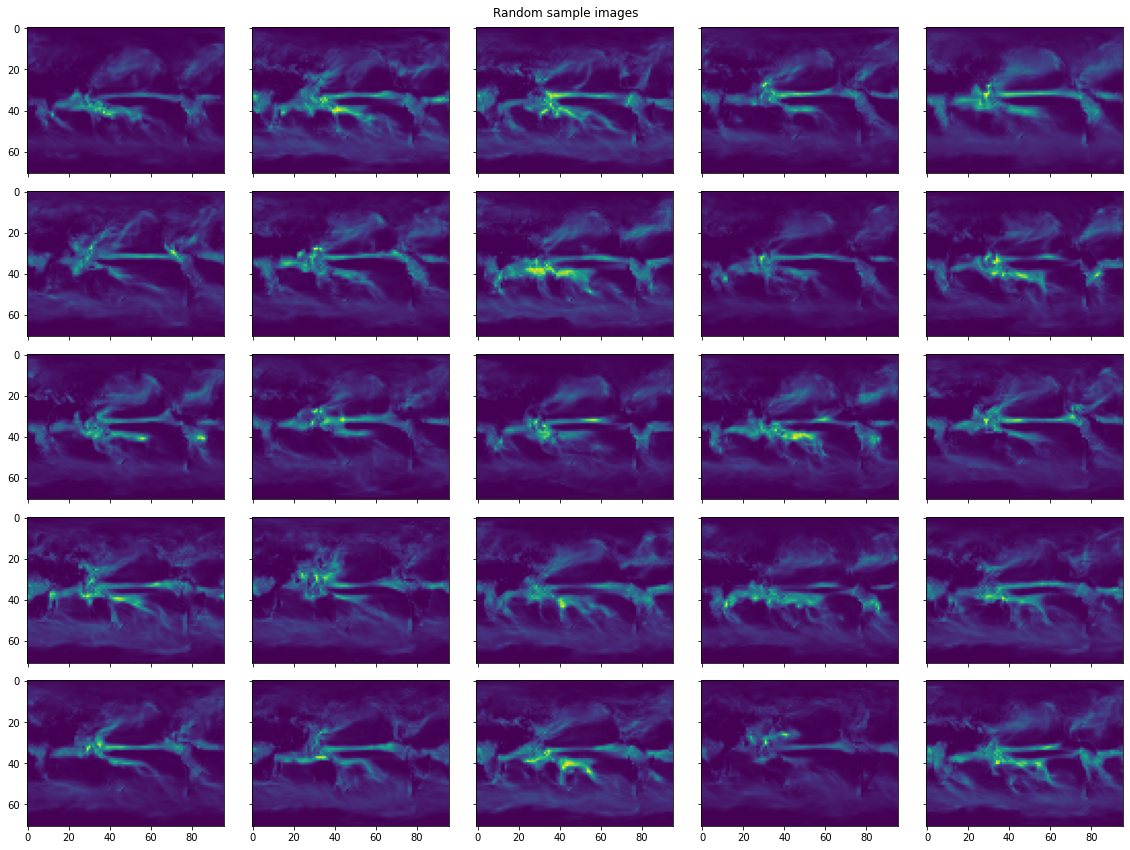

In [52]:
n_x = 5
n_y = 5
norm = matplotlib.colors.Normalize(0,np.amax(precip_monthly))
random_timesteps = np.random.randint(low=0,high=precip_monthly.shape[0],size=n_x*n_y)                                 
fig, axs = plt.subplots(n_x, n_y, sharex=True, sharey=True)
fig.suptitle('Random sample images')
fig.set_figheight(12)
fig.set_figwidth(16)
for i in range(n_x):                                     
    for j in range(n_y):    
        # print([random_timesteps[j+4*i]])
        axs[i,j].imshow(precip_monthly[random_timesteps[j+n_x*i],...],cmap="viridis")
plt.tight_layout()
plt.show()

# Isotopes - statistics on missing pixels

In [53]:
d18O_monthly.shape

(13822, 71, 96)

In [54]:
# reshape such that we have a axis for the months - assuming that we can infer month from index like this
# in fact we need to do this as a list of numpy arrays because the length is not divisible by 12.
d18O_monthly_month_list = []
# assuming the date stamps are correct, write an array, that gives the name of the month.
months_names = ["Dez", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov"]
for i in range(12):
    d18O_monthly_month_list.append(d18O_monthly[i::12,...])  # this only works if there are no missing months and if the months start with Dez.

### First neglect months. Just see in which fraction of timesteps each pixel is missing.

In [55]:
invalid_pixels = (d18O_monthly == fill_value)

In [56]:
frac_invalid_per_pixel = np.sum(invalid_pixels, axis = 0) / d18O_monthly.shape[0]

In [57]:
print("Fraction of months, in which pixel is missing.", "Max over all pixels:", np.amax(frac_invalid_per_pixel), "Min over all pixels:", np.amin(frac_invalid_per_pixel))

Fraction of months, in which pixel is missing. Max over all pixels: 0.24526117783244103 Min over all pixels: 0.0


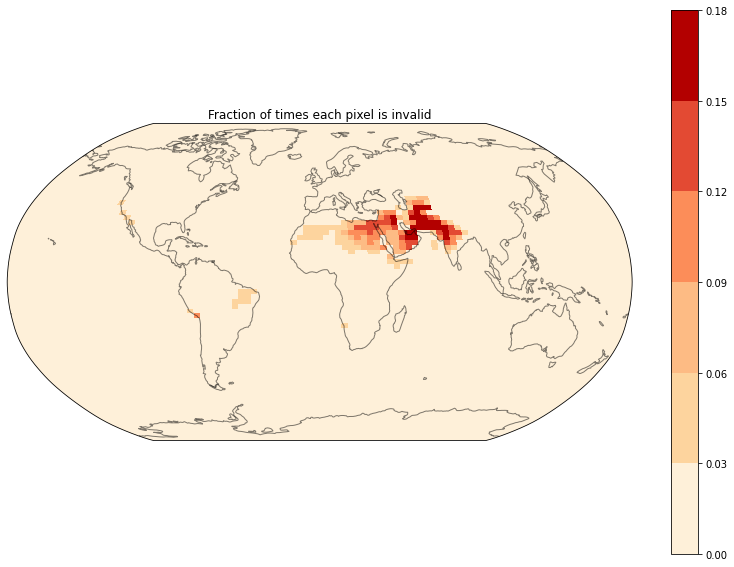

In [58]:
fig = plt.figure()
ax = fig.add_subplot(projection=ccrs.Robinson())
ax.set_global()

norm = matplotlib.colors.BoundaryNorm(np.linspace(0,0.18,7), 6)
colors = ["#fef0d9","#fdd49e","#fdbb84","#fc8d59","#e34a33","#b30000"]
cmap= matplotlib.colors.ListedColormap(colors)

data, lon_plot = add_cyclic_point(frac_invalid_per_pixel, coord = lon)
lo, la = np.meshgrid(lon_plot, lat)
layer = ax.pcolormesh(lo, la, data, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm) 
  
ax.coastlines(alpha=0.5)
plt.title("Fraction of times each pixel is invalid")
plt.colorbar(layer)

plt.savefig(DIRECTORY_IMAGES+"missing_pixels.pdf")
plt.savefig(DIRECTORY_IMAGES+"missing_pixels.png")
plt.savefig(DIRECTORY_IMAGES+"missing_pixels.jpg")
plt.show()

In [59]:
print("Maximum fraction of times a single pixel is missing:", np.amax(frac_invalid_per_pixel))

Maximum fraction of times a single pixel is missing: 0.24526117783244103


###  now separate months:

Now do the same for each month. And for each pixel take the max over the months to get a worst case estimate.

In [60]:
frac_invalid_per_pixel_per_month = np.zeros((12,len(lat), len(lon)))

In [61]:
d18O_monthly_month_list[i].shape[0]

1151

In [62]:
for i in range(12):
    tmp_inv_pixels = (d18O_monthly_month_list[i] == fill_value)
    frac_invalid_per_pixel_per_month[i,...] = np.sum(tmp_inv_pixels, axis = 0) / d18O_monthly_month_list[i].shape[0]

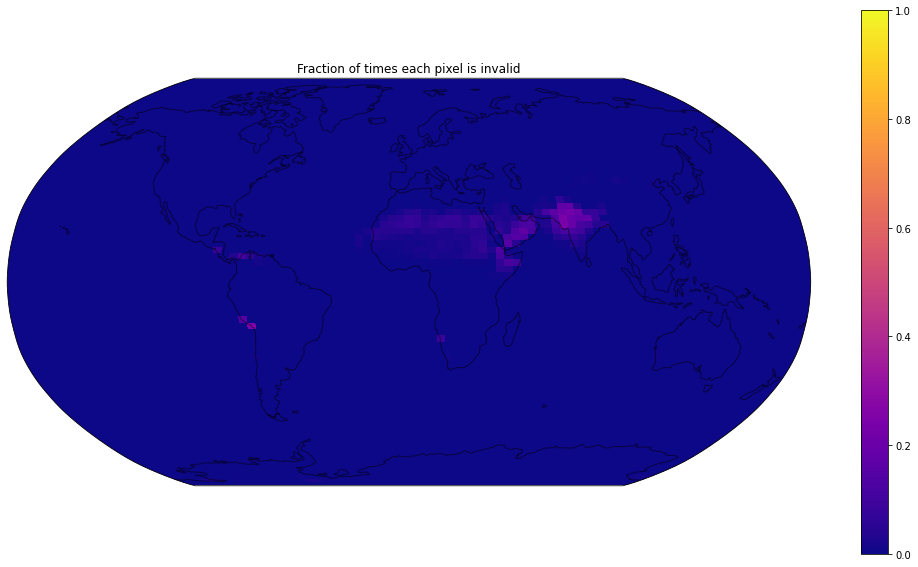

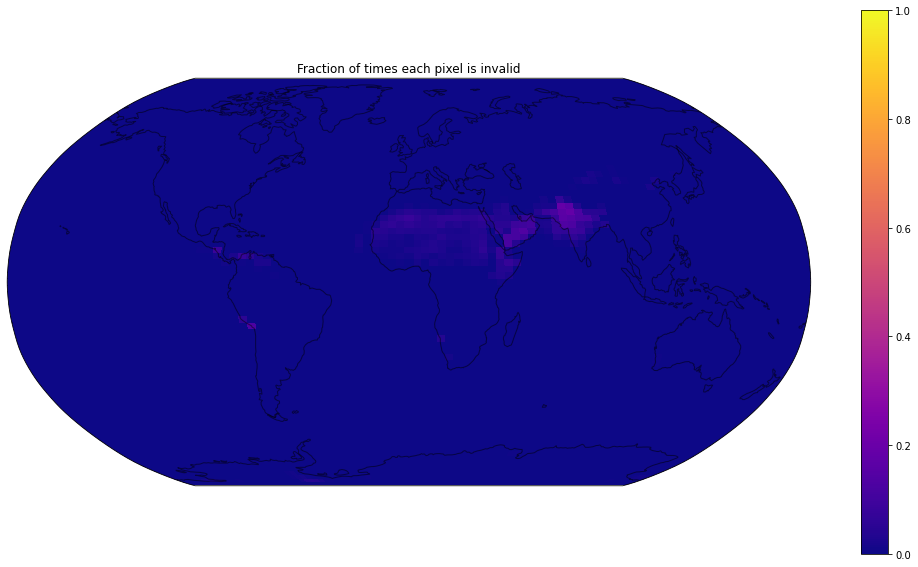

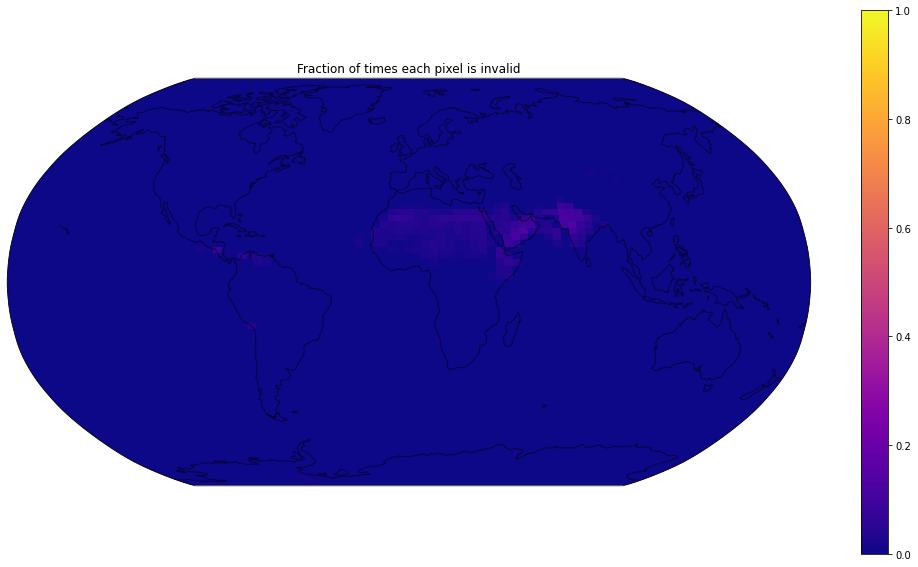

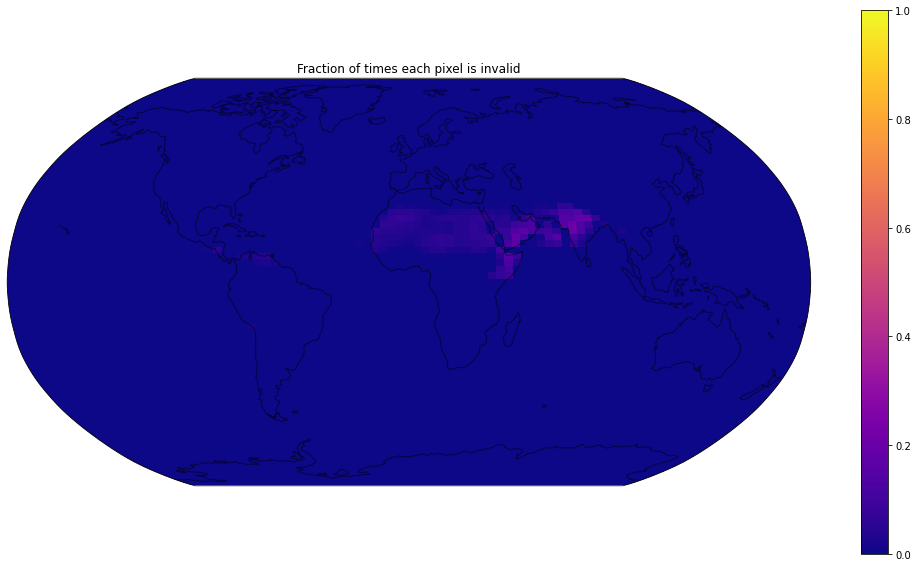

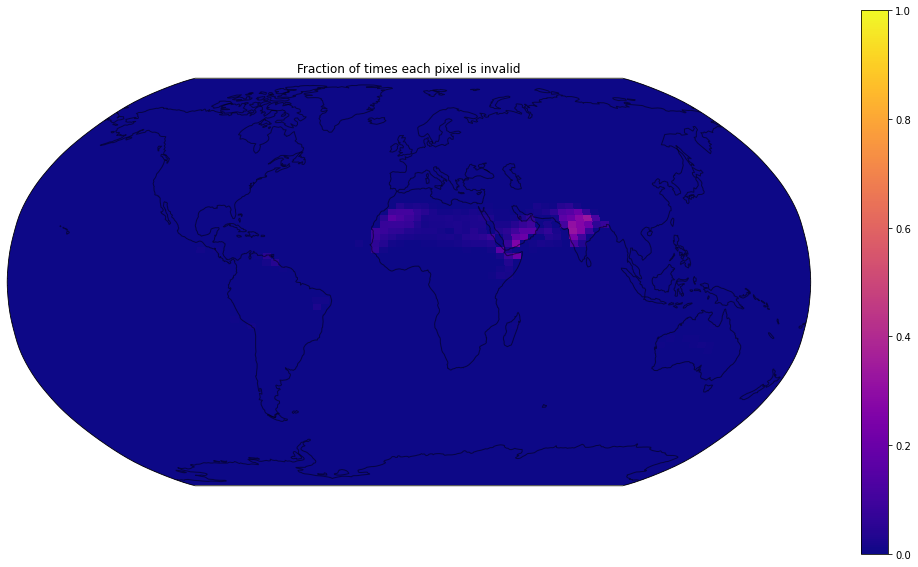

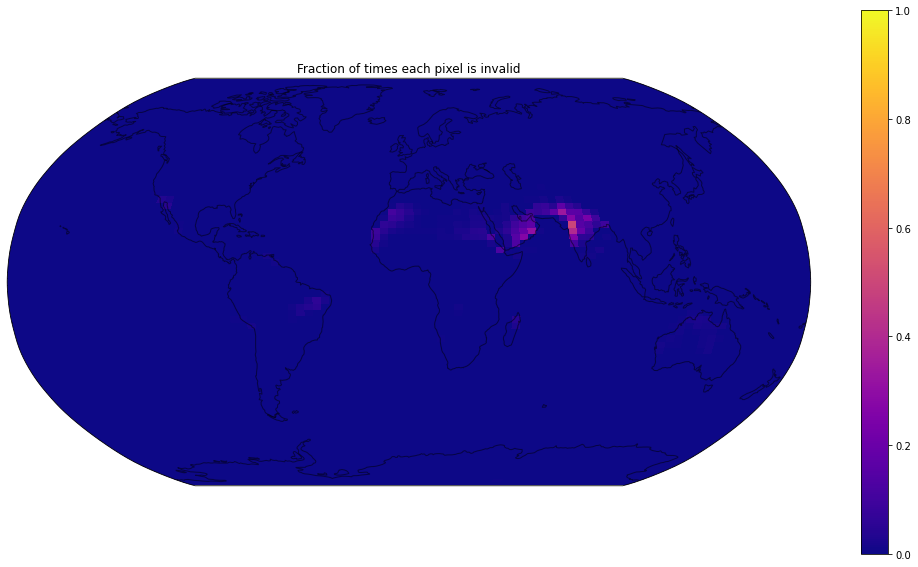

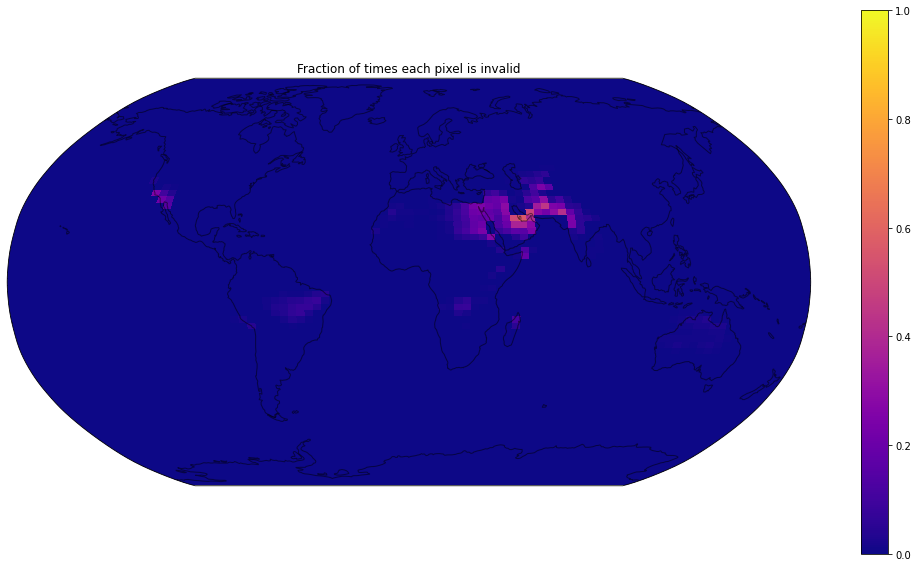

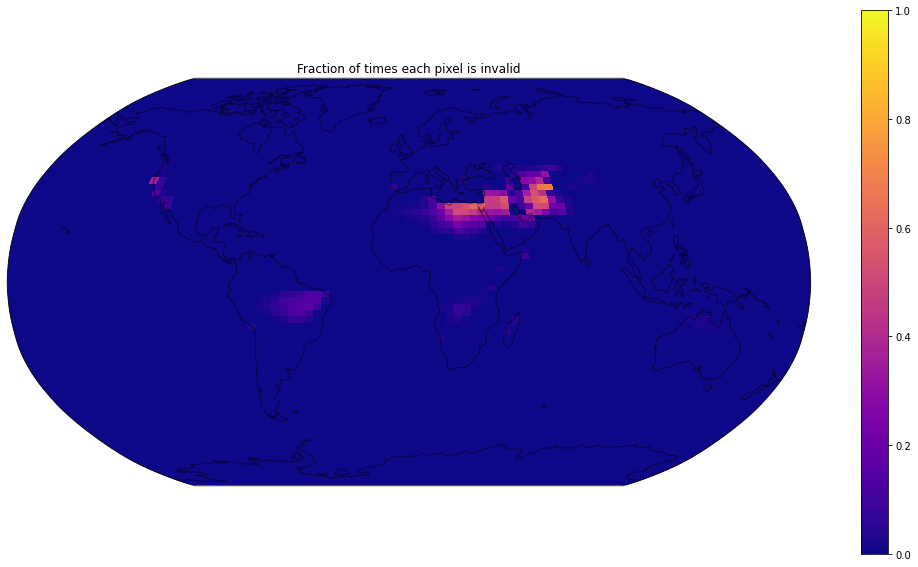

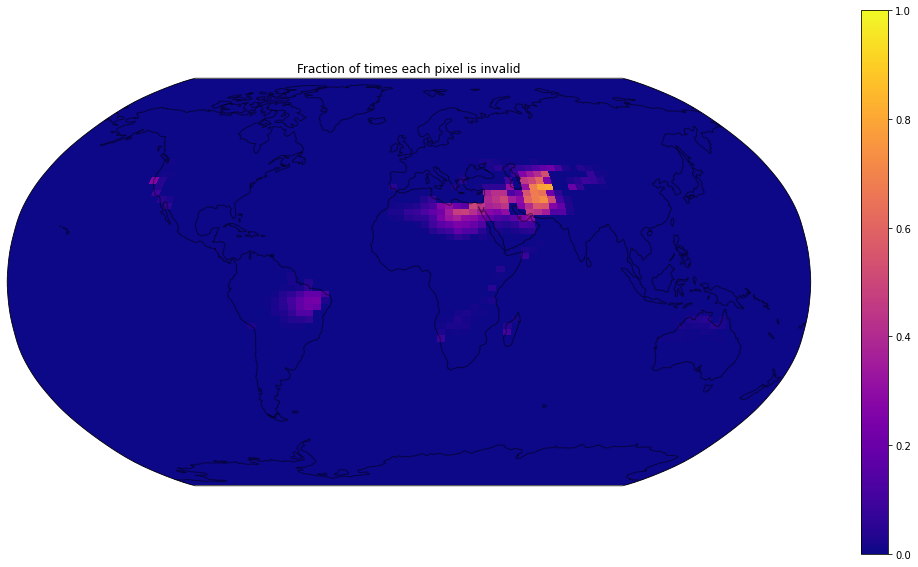

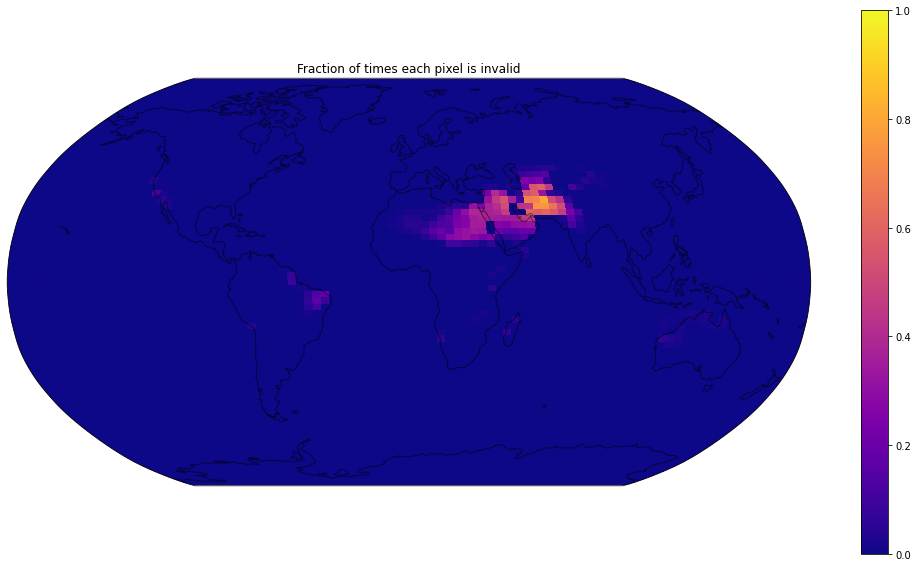

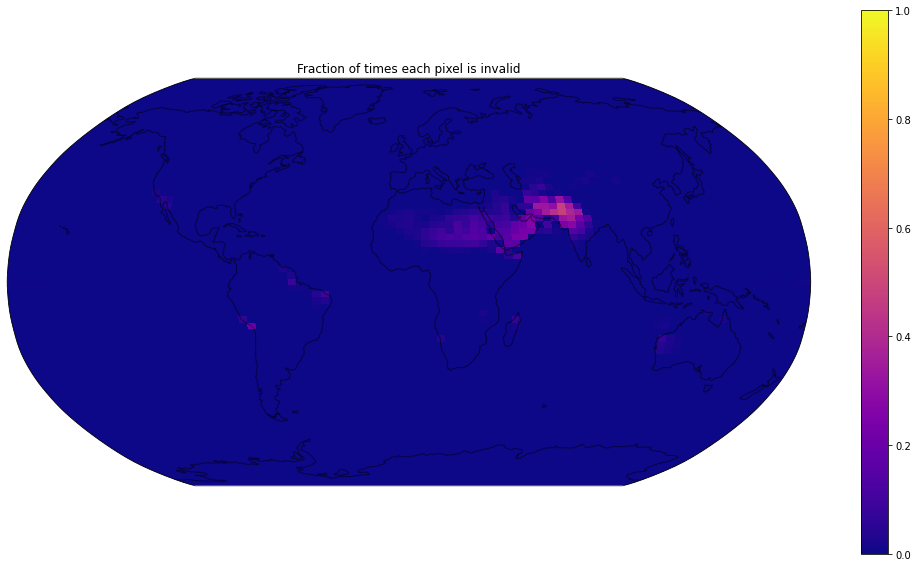

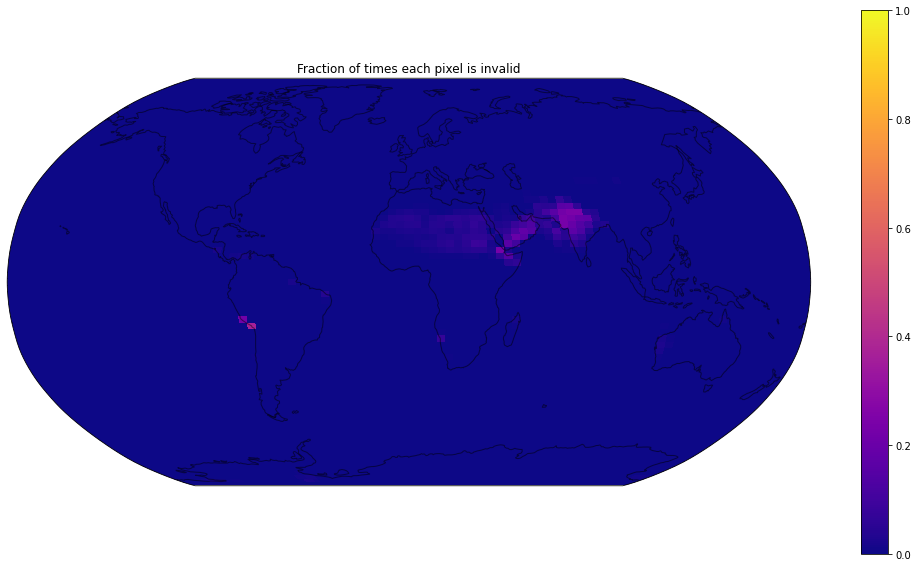

In [63]:
for i in range(12):
    fig = plt.figure(figsize=(18,10))
    ax = fig.add_subplot(projection=ccrs.Robinson())
    ax.set_global()

    data, lon_plot = add_cyclic_point(frac_invalid_per_pixel_per_month[i], coord = lon)
    lo, la = np.meshgrid(lon_plot, lat)
    norm = matplotlib.colors.Normalize(0,1)
    layer = ax.pcolormesh(lo, la, data, transform=ccrs.PlateCarree(), cmap="plasma", norm=norm)    

    ax.coastlines(alpha=0.5)
    plt.colorbar(layer)
    plt.title("Fraction of times each pixel is invalid")
    plt.show()

In [64]:
max_frac_invalid_per_pixel = np.amax(frac_invalid_per_pixel_per_month, axis=0)

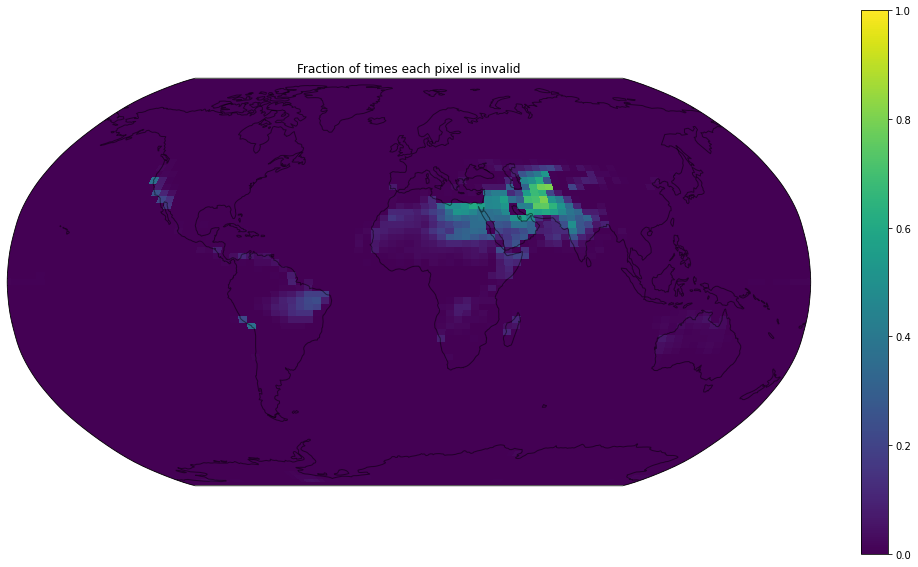

In [65]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(projection=ccrs.Robinson())
ax.set_global()

data, lon_plot = add_cyclic_point(max_frac_invalid_per_pixel, coord = lon)
lo, la = np.meshgrid(lon_plot, lat)

norm = matplotlib.colors.Normalize(0,1)
layer = ax.pcolormesh(lo, la, data, transform=ccrs.PlateCarree(), cmap="viridis", norm=norm)    

ax.coastlines(alpha=0.5)
plt.colorbar(layer)
plt.title("Fraction of times each pixel is invalid")
plt.show()

In [66]:
print("max value over all pixels:", np.amax(max_frac_invalid_per_pixel))

max value over all pixels: 0.8038194444444444


One natural question that arises is, whether this "dropout" of pixels is really random, or if it is is related to changes in the climatic state. One thing that we can do is to look at the mean of temperature and precip - seperately for cases in which the pixel has missing values and for cases, in which it doesn't.

In [67]:
ind = np.unravel_index(frac_invalid_per_pixel_per_month.argmax(), frac_invalid_per_pixel_per_month.shape)

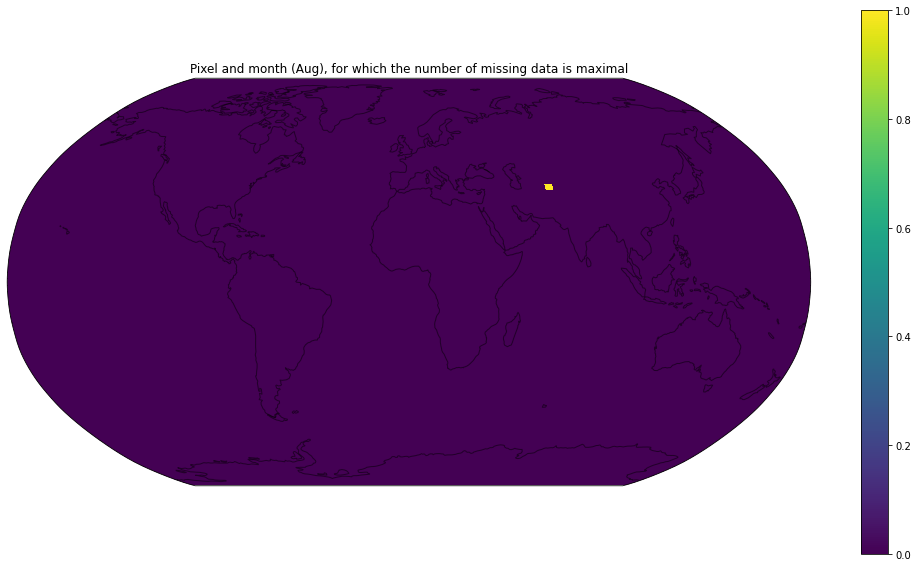

In [68]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(projection=ccrs.Robinson())
ax.set_global()

data = np.zeros((len(lat),len(lon)))
data[ind[1], ind[2]] = 1
data, lon_plot = add_cyclic_point(data, coord = lon)
lo, la = np.meshgrid(lon_plot, lat)

norm = matplotlib.colors.Normalize(0,1)
layer = ax.pcolormesh(lo, la, data, transform=ccrs.PlateCarree(), cmap="viridis", norm=norm)    

ax.coastlines(alpha=0.5)
plt.colorbar(layer)
plt.title("Pixel and month ({}), for which the number of missing data is maximal".format(months_names[ind[0]]))
plt.show()

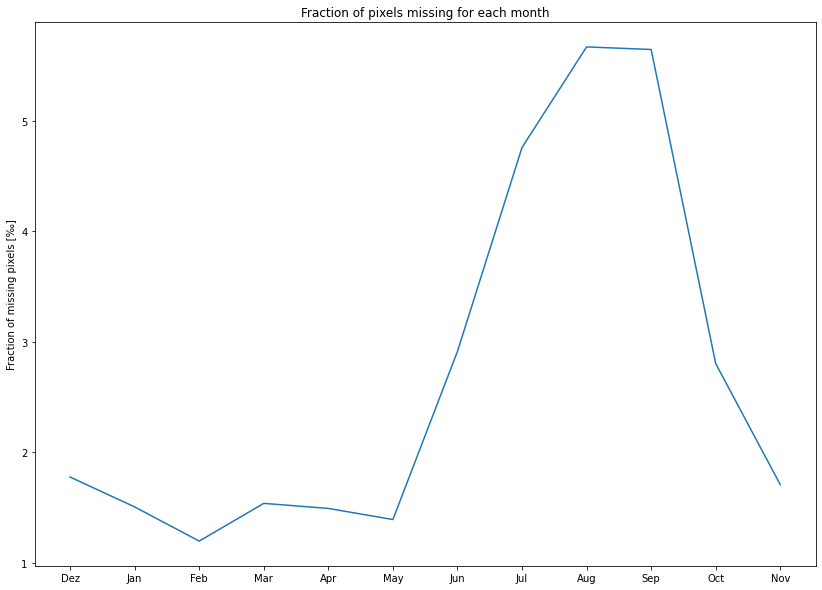

In [69]:
plt.plot(months_names, 1000*np.average(frac_invalid_per_pixel_per_month, axis=(1,2)))
plt.title("Fraction of pixels missing for each month")
plt.ylabel("Fraction of missing pixels [‰]")

plt.savefig(DIRECTORY_IMAGES + "missing_pixels_months.pdf")
plt.savefig(DIRECTORY_IMAGES + "missing_pixels_months.png")
plt.savefig(DIRECTORY_IMAGES + "missing_pixels_months.jpg")

plt.show()

In [70]:
# precip: JFM mean - JAS mean

precip_diff = precip_monthly[2::12,...]\
              - precip_monthly[9::12]

precip_diff = np.mean(precip_diff,axis=0) / np.mean(precip_monthly,axis=0)

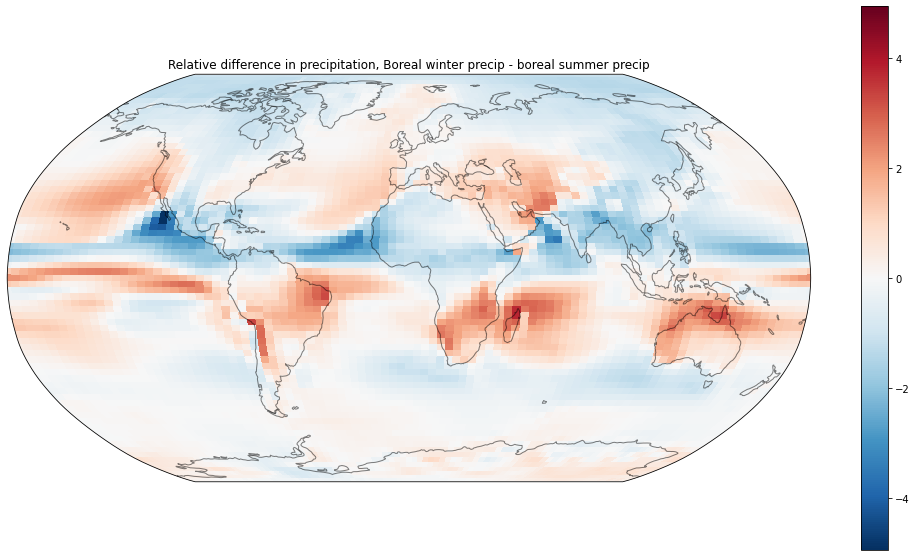

In [71]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(projection=ccrs.Robinson())
ax.set_global()

data, lon_plot = add_cyclic_point(precip_diff, coord = lon)
lo, la = np.meshgrid(lon_plot, lat)

bd = max(abs(np.amax(precip_diff)), abs(np.amin(precip_diff)))
norm = matplotlib.colors.Normalize(vmin=-bd, vmax=bd)
layer = ax.pcolormesh(lo, la, data, transform=ccrs.PlateCarree(), cmap="RdBu_r", norm=norm)    

ax.coastlines(alpha=0.5)
plt.colorbar(layer)
plt.title("Relative difference in precipitation, Boreal winter precip - boreal summer precip")
plt.show()

# How many missing pixels are there in each timestep?

In [72]:
sum_invalid_pixels = np.sum(invalid_pixels, axis=(1,2))

overall, there are 6816 pixels, this means at most 0.043867% of the pixels are missing


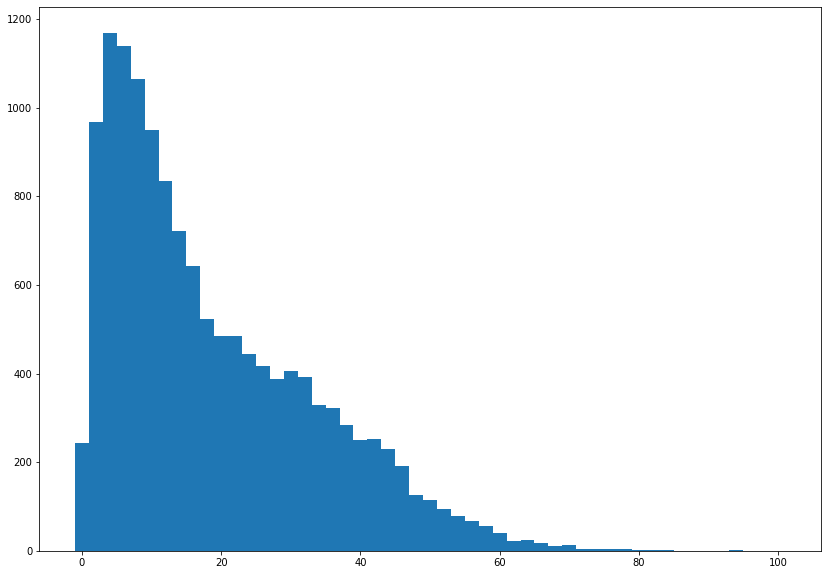

In [73]:
bins=np.linspace(-1,101,52)
plt.hist(sum_invalid_pixels,bins=bins)
print("overall, there are {} pixels, this means at most {:2f}% of the pixels are missing".format(len(lat)*len(lon), np.amax(sum_invalid_pixels)/(len(lat)*len(lon))))